In [12]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import re
import wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import warnings
warnings.filterwarnings('ignore')

In [13]:
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [15]:
# Создание облаков слов
def create_wordcloud(data, title):
    text = ' '.join(data)
    wordcloud = WordCloud(stopwords=stop_words, 
                          background_color='white', 
                          width=800, 
                          height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [16]:
# Загрузка данных
train_data_path = '/home/jupyter/datasphere/project/data_sets/fbdataset_train.tsv'
test_data_path = '/home/jupyter/datasphere/project/data_sets/fbdataset_test.tsv'

train_data = pd.read_csv(train_data_path, sep='\t')
test_data = pd.read_csv(test_data_path, sep='\t')

train_data = shuffle(train_data, random_state=42)
train_data.reset_index(drop=True, inplace=True)
test_data = shuffle(test_data, random_state=42)
test_data.reset_index(drop=True, inplace=True)

# Объединение тренировочных и тестовых данных
combined_data = pd.concat([train_data, test_data], ignore_index=True)

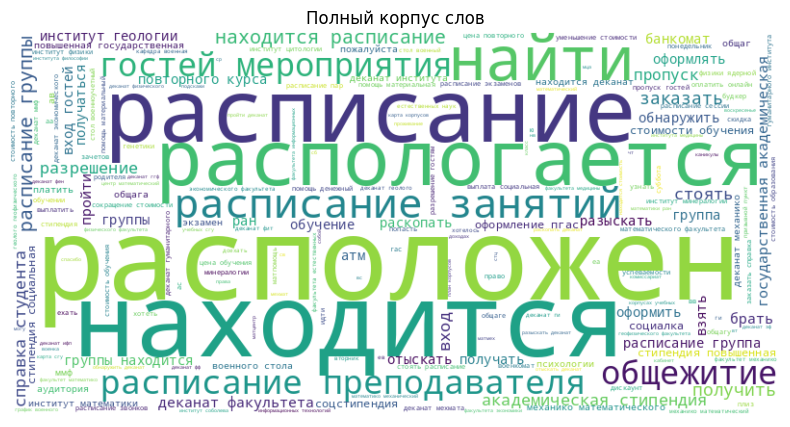

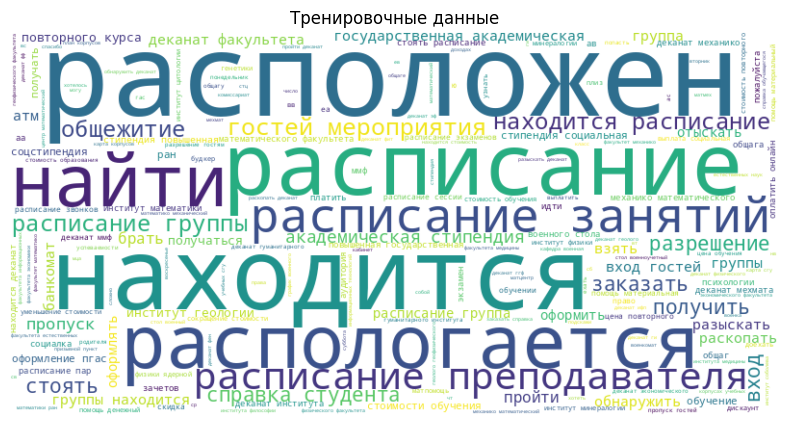

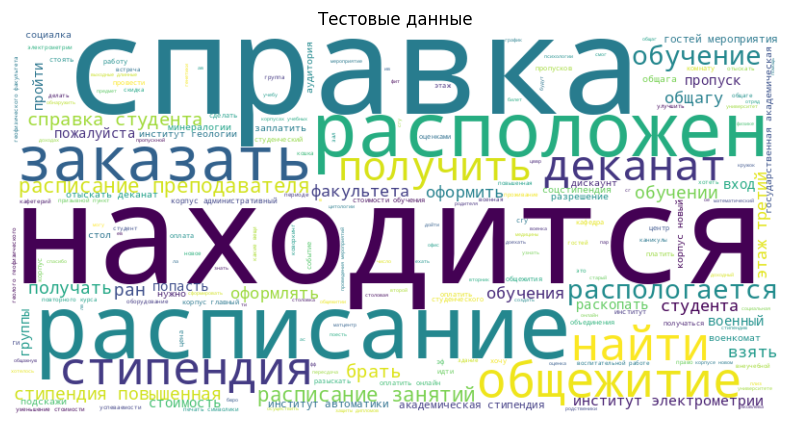

In [17]:
combined_text = combined_data['text'].apply(preprocess_text)
train_text = train_data['text'].apply(preprocess_text)
test_text = test_data['text'].apply(preprocess_text)

create_wordcloud(combined_text, 'Полный корпус слов')
create_wordcloud(train_text, 'Тренировочные данные')
create_wordcloud(test_text, 'Тестовые данные')

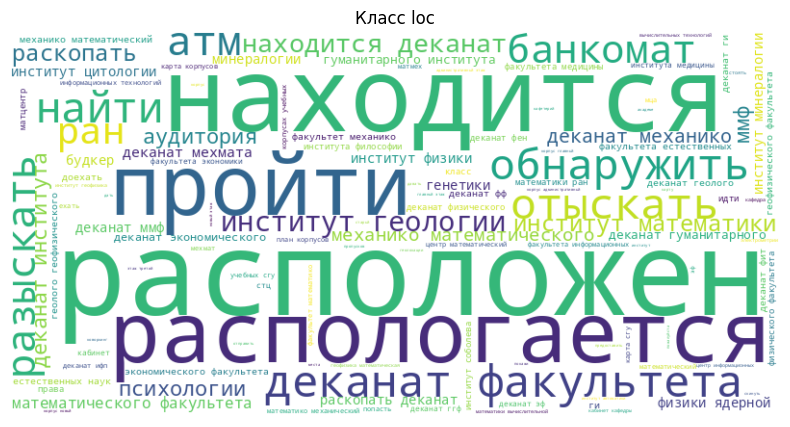

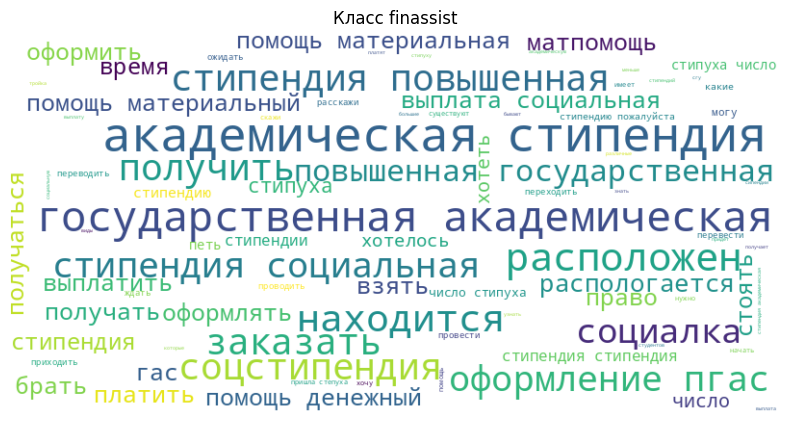

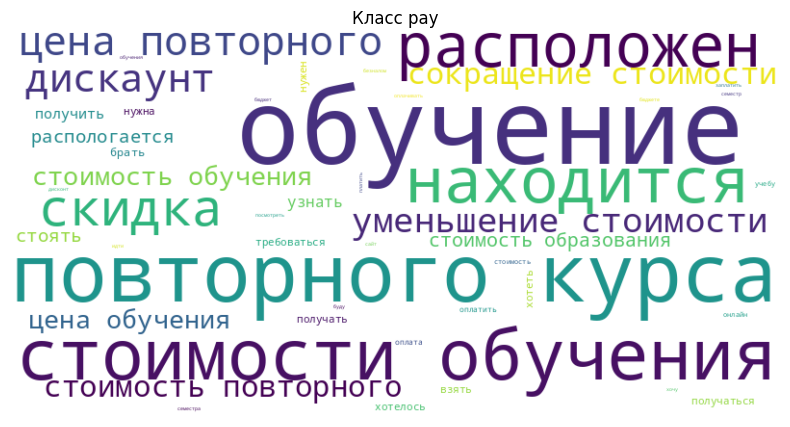

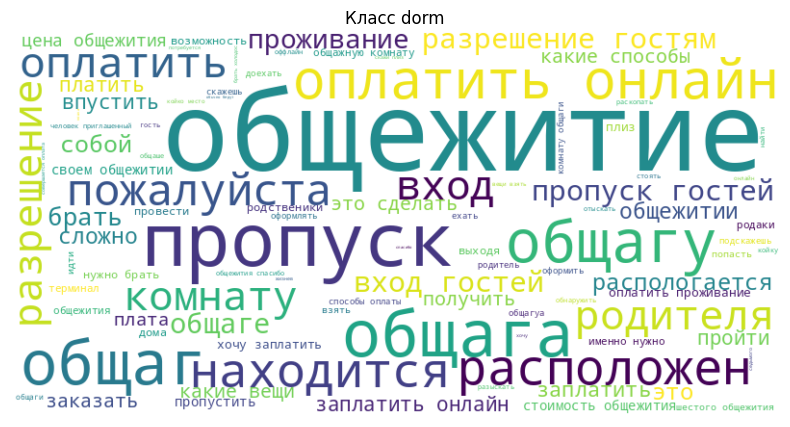

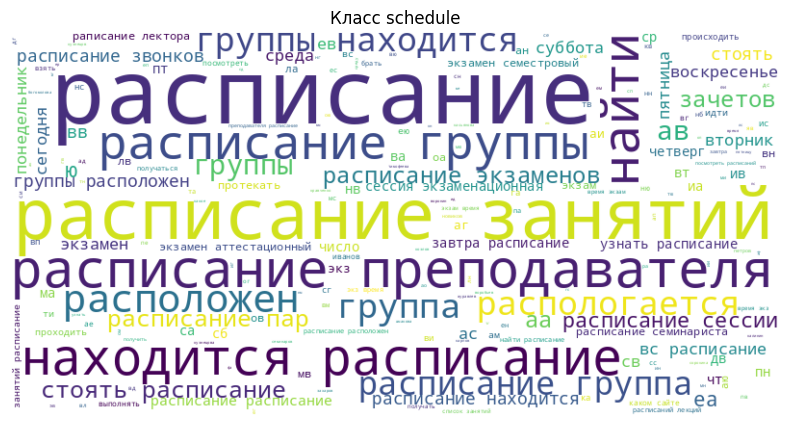

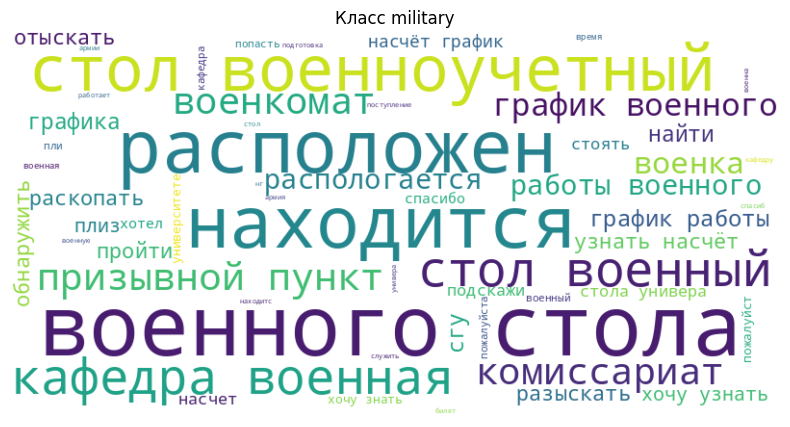

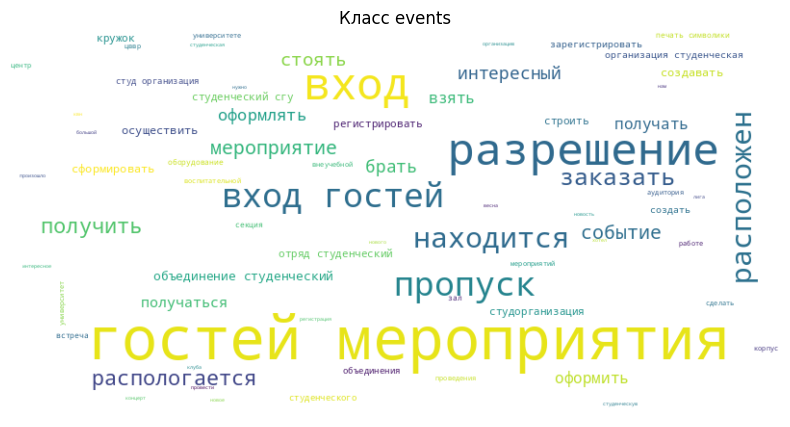

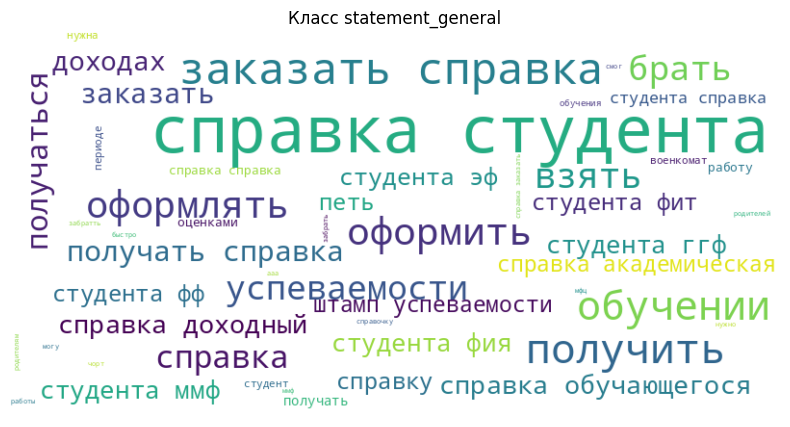

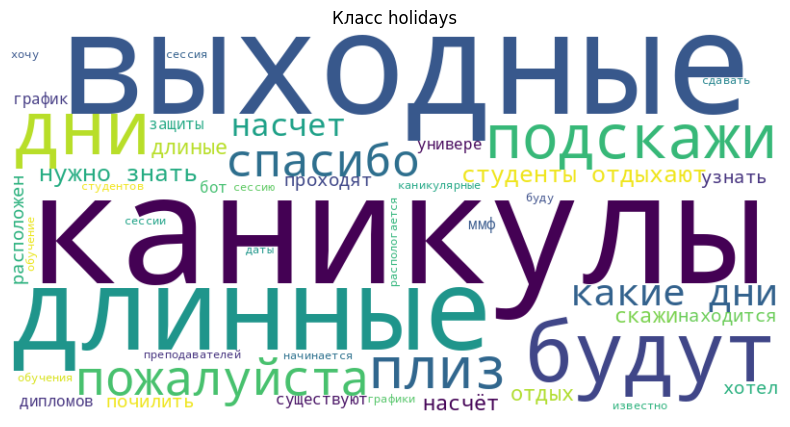

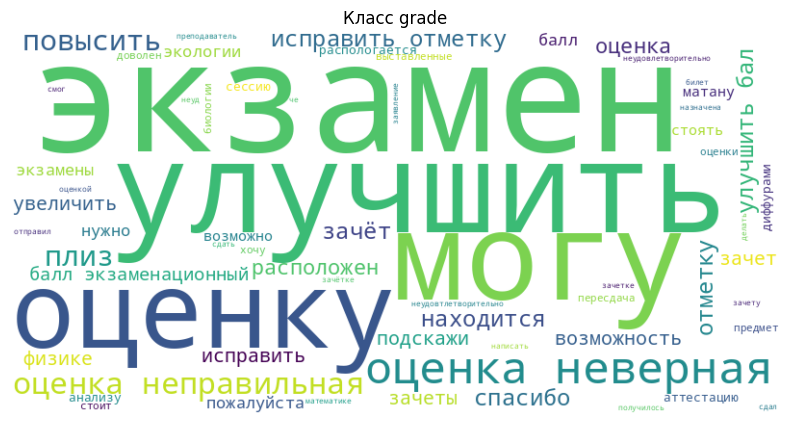

In [19]:
# Создание облаков слов для каждого класса
if 'label' in combined_data.columns:
    for class_label in combined_data['label'].unique():
        try:
            class_text = combined_data[combined_data['label'] == class_label]['text'].apply(preprocess_text)
            create_wordcloud(class_text, f'Класс {class_label}')
        except:
            pass